In [1]:
from Modulos.modulos_auxiliares import *

# Importando a imagem da pasta Amostras

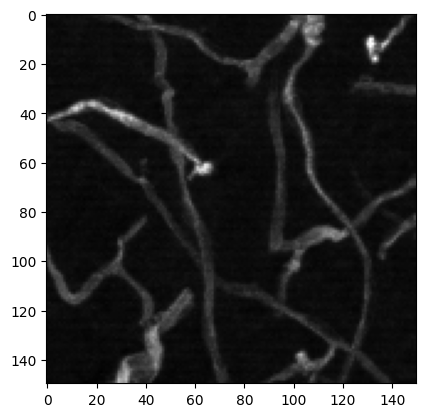

In [2]:
#importando uma imagem
nome = 'corte_teste.tiff'##input("nome da imagem a ser importada:")
nome = "../Amostras/2D/" + nome
img = plt.imread(nome)

img = img[100:250, 150:300]

#remove after
#plt.figure(figsize = [15,15])
plt.imshow(img, "gray")

# Segmentando a imagem

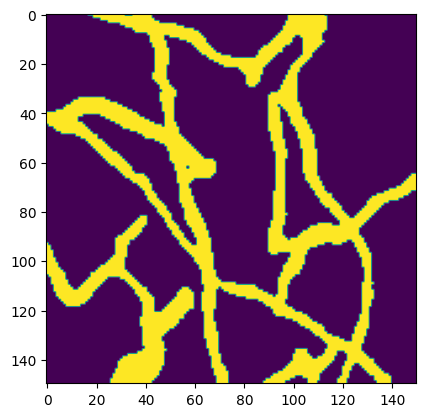

In [3]:
img_suave = seg.vessel_segmentation(im.Image(img), 1)
img_suave = img_suave.data

#remove after
#plt.figure(figsize = [10,10])
plt.imshow(img_suave)

# Teste de resumo de codigo feitos até então

In [4]:
## teste de resumo de codigo até então


noise_aplication = [0., 0.05, 0.1, 0.15, 0.2, 0.25]
noise_treatment = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
# talvez seria interessante criar uma classe para todos os valores de comparação
# mas até lá, vou fazer do jeito UGA
iou_Cesar = []
tpr_Cesar = []
ppv_Cesar = []
iou_graph_Cesar = []
tpr_graph_Cesar = []
ppv_graph_Cesar = []

iou_skimage = []
tpr_skimage = []
ppv_skimage = []
iou_graph_skimage = []
tpr_graph_skimage = []
ppv_graph_skimage = []


iou_skimage_lee = []
tpr_skimage_lee = []
ppv_skimage_lee = []
iou_graph_skimage_lee = []
tpr_graph_skimage_lee = []
ppv_graph_skimage_lee = []

iou_MA = []
tpr_MA = []
ppv_MA = []
iou_graph_MA = []
tpr_graph_MA = []
ppv_graph_MA = []


img_noise = []
skeleton_Cesar = []
graph_Cesar = []
graph_to_img_Cesar = []

skeleton_MA = []
graph_MA = []
graph_to_img_MA = []

skeleton_skimage = []
graph_skimage = []
graph_to_img_skimage = []

skeleton_skimage_lee = []
graph_skimage_lee = []
graph_to_img_skimage_lee = []


for noise in noise_aplication:
    #apply noise
    #variable for recive the noise and tratament of noise
    img_aux = random_noise(img_suave, noise)
    
    #remove noise
    img_aux = 1 - util.remove_small_comp(1 - img_aux, 5)
    img_aux = util.remove_small_comp(img_aux, 90)
    img_noise.append(img_aux)
    
    # skeletonize transform
    _ = skn.skeletonize(im.Image(img_noise[-1]))
    skeleton_Cesar.append( _.data )
    
    skeleton_skimage.append(skimage.morphology.skeletonize(img_noise[-1], method = 'zhang') )
    
    skeleton_MA.append(skimage.morphology.medial_axis(img_noise[-1]) )
    
    skeleton_skimage_lee.append(skimage.morphology.skeletonize(img_noise[-1], method = 'lee'))
    
    # quality values
    iou, tpr, ppv = confusion_matrix(skeleton_Cesar[0], skeleton_Cesar[-1])
    iou_Cesar.append(iou)
    tpr_Cesar.append(tpr)
    ppv_Cesar.append(ppv)
    
    iou, tpr, ppv = confusion_matrix(skeleton_skimage[0], skeleton_skimage[-1])
    iou_skimage.append(iou)
    tpr_skimage.append(tpr)
    ppv_skimage.append(ppv)
    
    iou, tpr, ppv = confusion_matrix(skeleton_MA[0], skeleton_MA[-1])
    iou_MA.append(iou)
    tpr_MA.append(tpr)
    ppv_MA.append(ppv)
    
    iou, tpr, ppv = confusion_matrix(skeleton_skimage_lee[0], skeleton_skimage_lee[-1])
    iou_skimage_lee.append(iou)
    tpr_skimage_lee.append(tpr)
    ppv_skimage_lee.append(ppv)
    
    
    # transform a skeleton into a networkx graph
    graph_Cesar.append(creation.create_graph( im.Image(skeleton_Cesar[-1]) ) )
    
    graph_skimage.append(creation.create_graph( im.Image(skeleton_skimage[-1])))
    
    graph_MA.append(creation.create_graph( im.Image(skeleton_MA[-1])))
    
    graph_skimage_lee.append(creation.create_graph( im.Image(skeleton_skimage_lee[-1] ) ) )

    # auxiliar variable for break apart the noise_treatment value
    aux_iou_CHC = []
    aux_tpr_CHC = []
    aux_ppv_CHC = []
    
    aux_iou_skimage = []
    aux_tpr_skimage = []
    aux_ppv_skimage = []
    
    aux_iou_skimage_lee = []
    aux_tpr_skimage_lee = []
    aux_ppv_skimage_lee = []
    
    aux_iou_MA = []
    aux_tpr_MA = []
    aux_ppv_MA = []
    
    for remove_noise in noise_treatment:
        # remove branches
        saida = ad.adjust_graph(graph_Cesar[-1], remove_noise)
        
        #transform a networkx graph in image
        _ = util.graph_to_img(saida)
        graph_to_img_Cesar.append( transform_nonbinary(_) )
        
        
        # remove branches
        saida = ad.adjust_graph(graph_skimage[-1], remove_noise)
        
        #transform a networkx graph in image
        _ = util.graph_to_img(saida)
        graph_to_img_skimage.append( transform_nonbinary(_) )
        
        
        # remove branches
        saida = ad.adjust_graph(graph_MA[-1], remove_noise)
        
        #transform a networkx graph in image
        _ = util.graph_to_img(saida)
        graph_to_img_MA.append( transform_nonbinary(_) )
        
        
        # remove branches
        saida = ad.adjust_graph(graph_skimage_lee[-1], remove_noise)
        
        #transform a networkx graph in image
        _ = util.graph_to_img(saida)
        graph_to_img_skimage_lee.append( transform_nonbinary(_) )
        
        #calculate iou, tpr and ppv 
        iou_tpr_ppv = confusion_matrix(skeleton_Cesar[0], graph_to_img_Cesar[-1])
        aux_iou_CHC.append(iou_tpr_ppv[0])
        aux_tpr_CHC.append(iou_tpr_ppv[1])
        aux_ppv_CHC.append(iou_tpr_ppv[2])
        
        iou_tpr_ppv = confusion_matrix(skeleton_MA[0], graph_to_img_MA[-1])
        aux_iou_MA.append(iou_tpr_ppv[0])
        aux_tpr_MA.append(iou_tpr_ppv[1])
        aux_ppv_MA.append(iou_tpr_ppv[2])
        
        iou_tpr_ppv = confusion_matrix(skeleton_skimage[0], graph_to_img_skimage[-1])
        aux_iou_skimage.append(iou_tpr_ppv[0])
        aux_tpr_skimage.append(iou_tpr_ppv[1])
        aux_ppv_skimage.append(iou_tpr_ppv[2])
        
        iou_tpr_ppv = confusion_matrix(skeleton_skimage_lee[0], graph_to_img_skimage_lee[-1])
        aux_iou_skimage_lee.append(iou_tpr_ppv[0])
        aux_tpr_skimage_lee.append(iou_tpr_ppv[1])
        aux_ppv_skimage_lee.append(iou_tpr_ppv[2])
        
        
    iou_graph_Cesar.append(aux_iou_CHC)
    tpr_graph_Cesar.append(aux_tpr_CHC)
    ppv_graph_Cesar.append(aux_ppv_CHC)
    
    iou_graph_MA.append(aux_iou_MA)
    tpr_graph_MA.append(aux_tpr_MA)
    ppv_graph_MA.append(aux_ppv_MA)
    
    iou_graph_skimage.append(aux_iou_skimage)
    tpr_graph_skimage.append(aux_tpr_skimage)
    ppv_graph_skimage.append(aux_ppv_skimage)
    
    iou_graph_skimage_lee.append(aux_iou_skimage_lee)
    tpr_graph_skimage_lee.append(aux_tpr_skimage_lee)
    ppv_graph_skimage_lee.append(aux_ppv_skimage_lee)

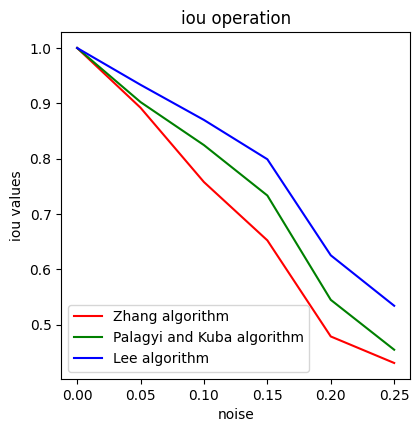

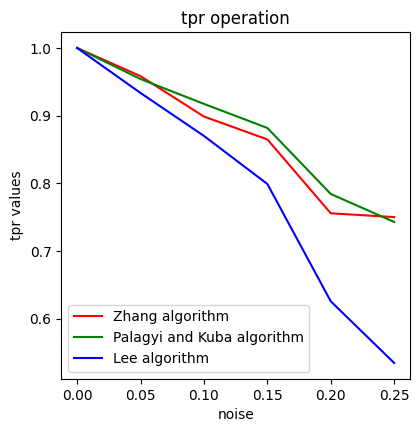

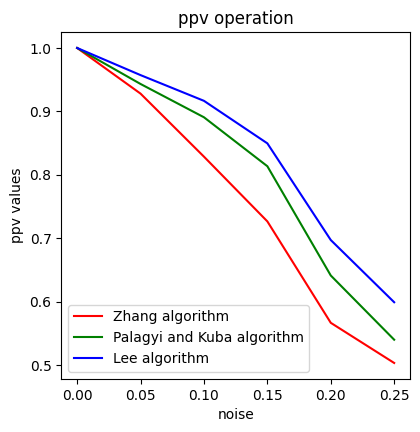

In [24]:
name = ('Zhang algorithm', 'Palagyi and Kuba algorithm', 'Lee algorithm')

plt.figure(figsize = [4.5,4.5])
#plt.subplot(4,2,1)
plot_graph((iou_skimage, iou_Cesar, iou_skimage_lee), name, 'iou values', 'iou operation', 
           noise_aplication, ('r', 'g', 'b'))#, save = True)
#plt.savefig('iou_operation_result.png')

plt.figure(figsize = [4.5,4.5])
#plt.subplot(4,2,2)
plot_graph((tpr_skimage, tpr_Cesar, iou_skimage_lee), name, 'tpr values', 'tpr operation', 
           noise_aplication, ('r', 'g', 'b'))#, save = True)

plt.figure(figsize = [4.5,4.5])
#plt.subplot(4,2,3)
plot_graph((ppv_skimage, ppv_Cesar, ppv_skimage_lee), name, 'ppv values', 'ppv operation', 
           noise_aplication, ('r', 'g', 'b'))#, save = True)

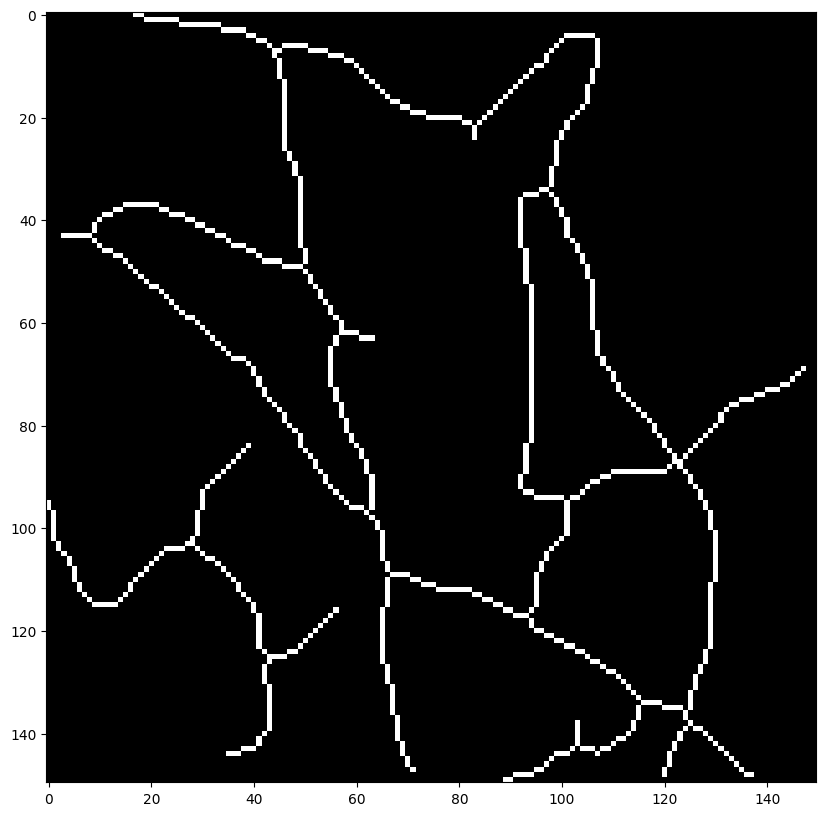

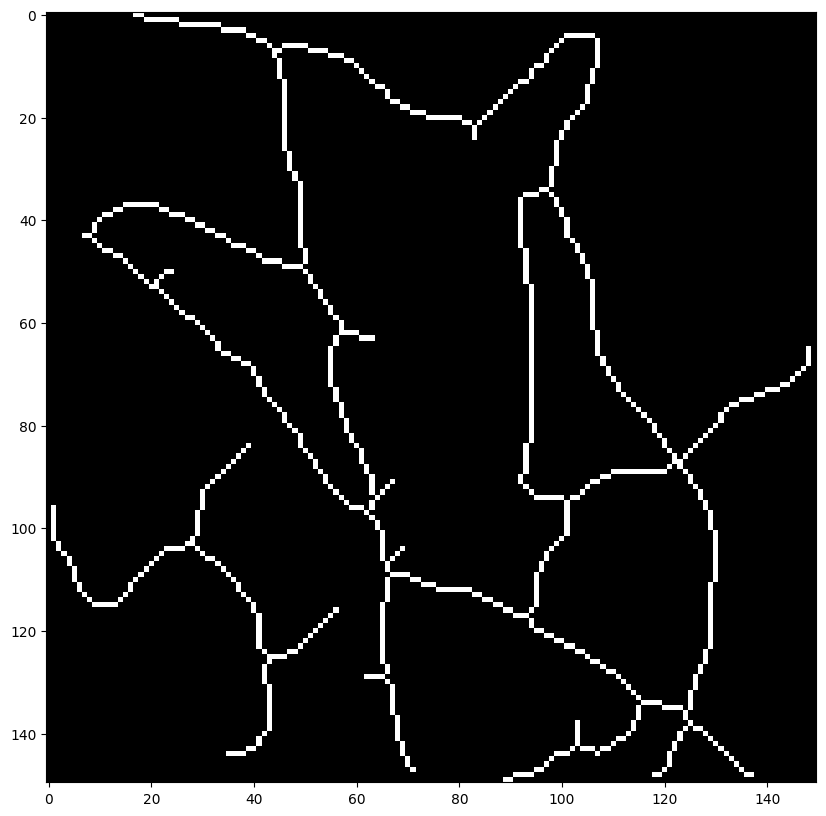

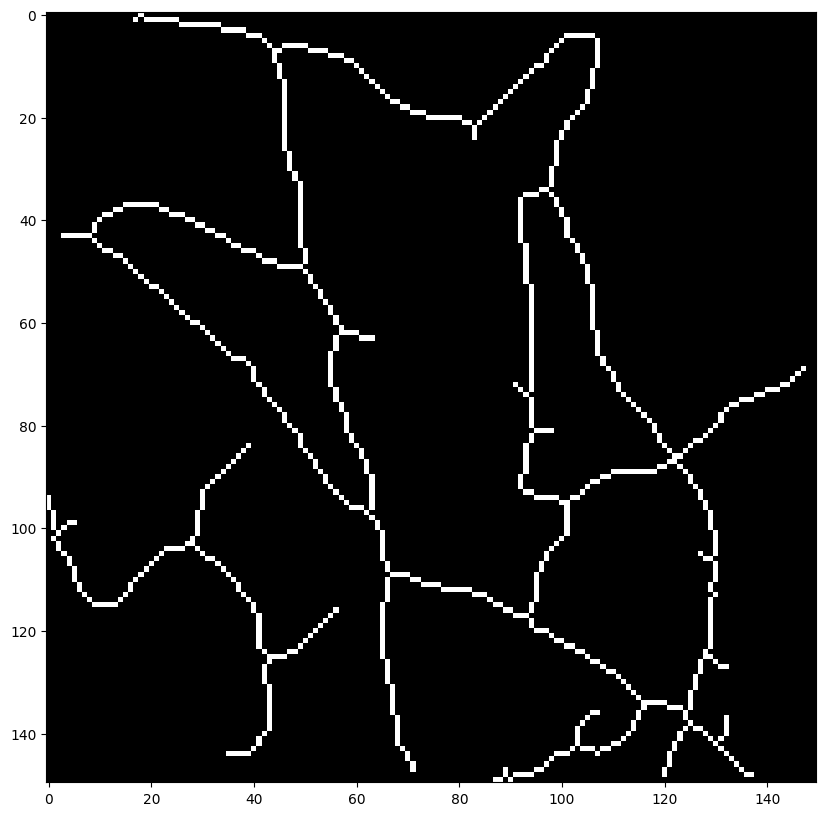

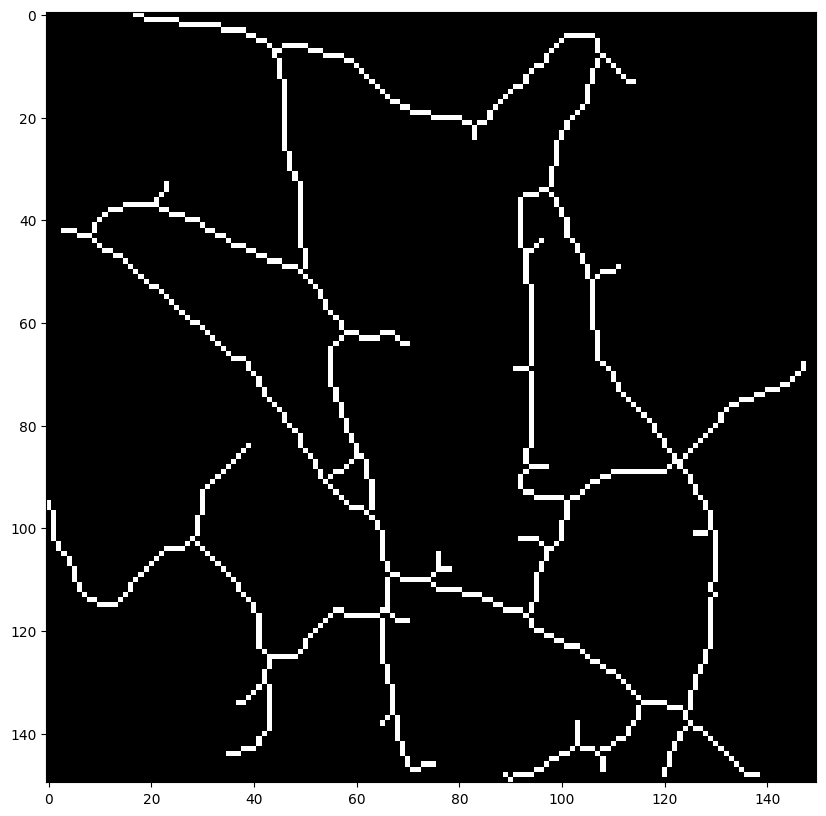

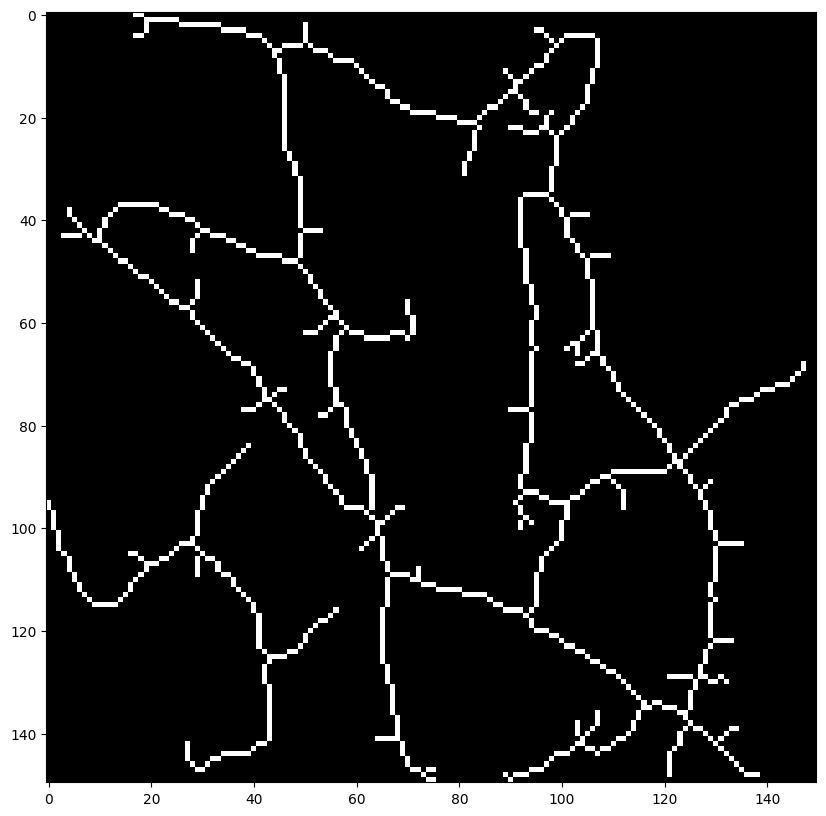

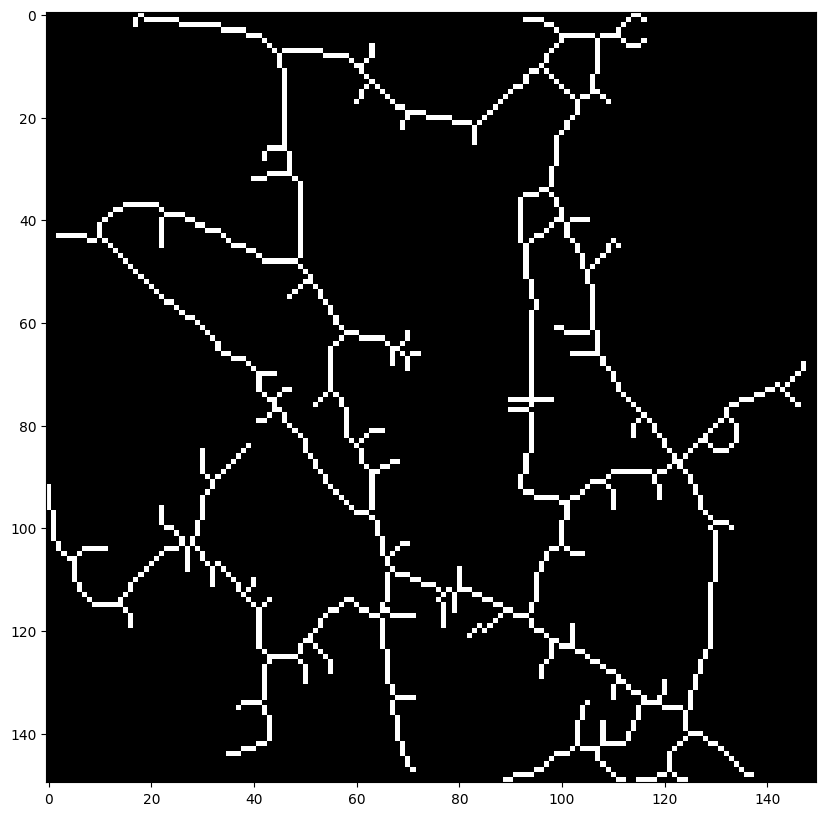

In [6]:
mostra_img(skeleton_skimage_lee)

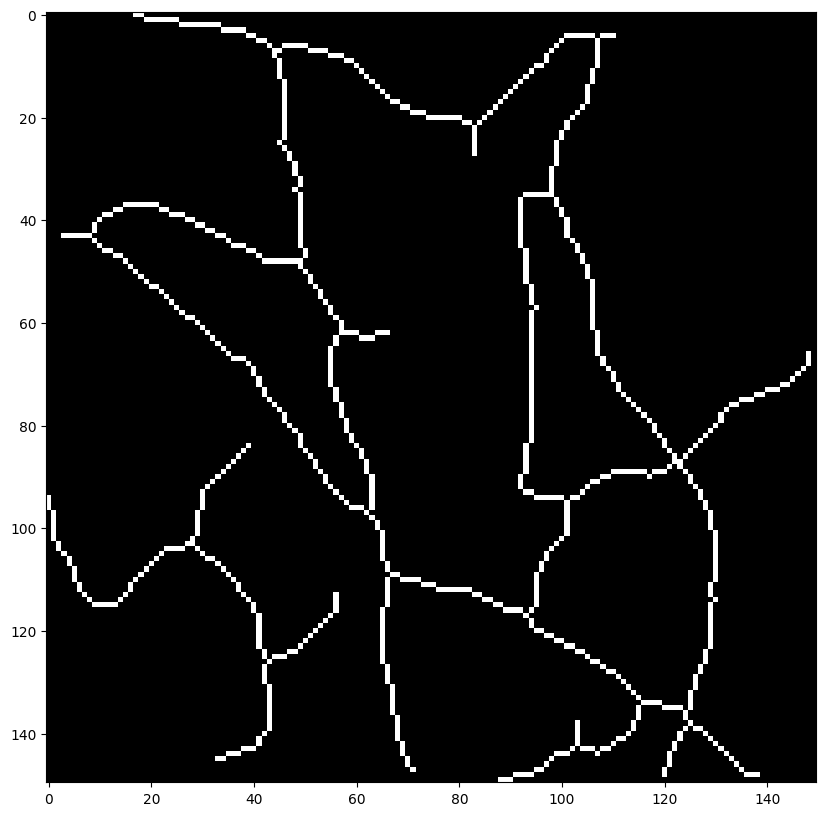

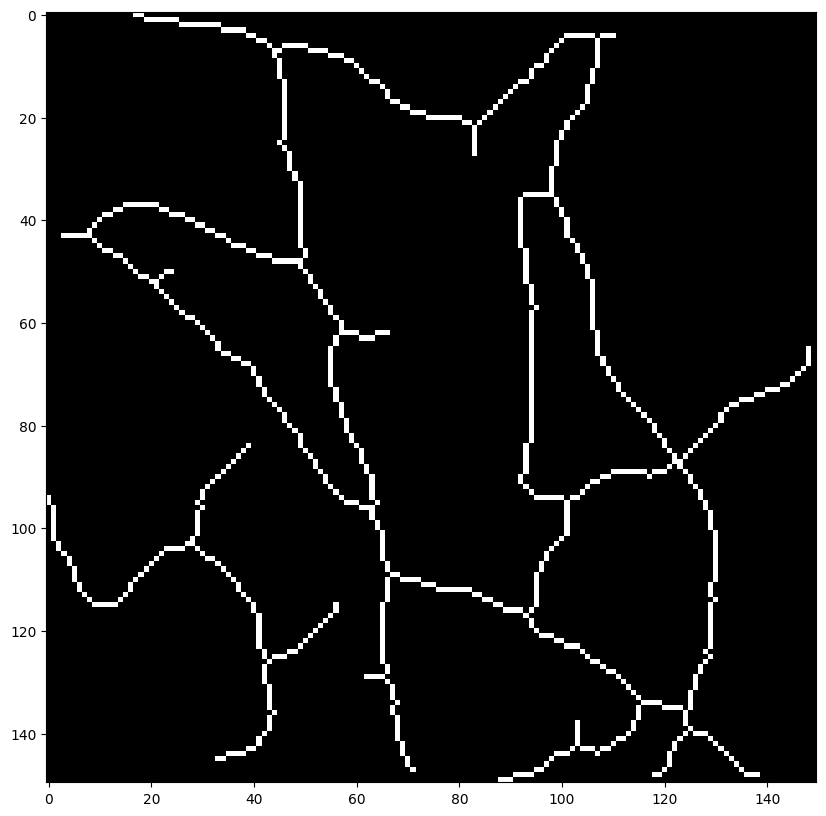

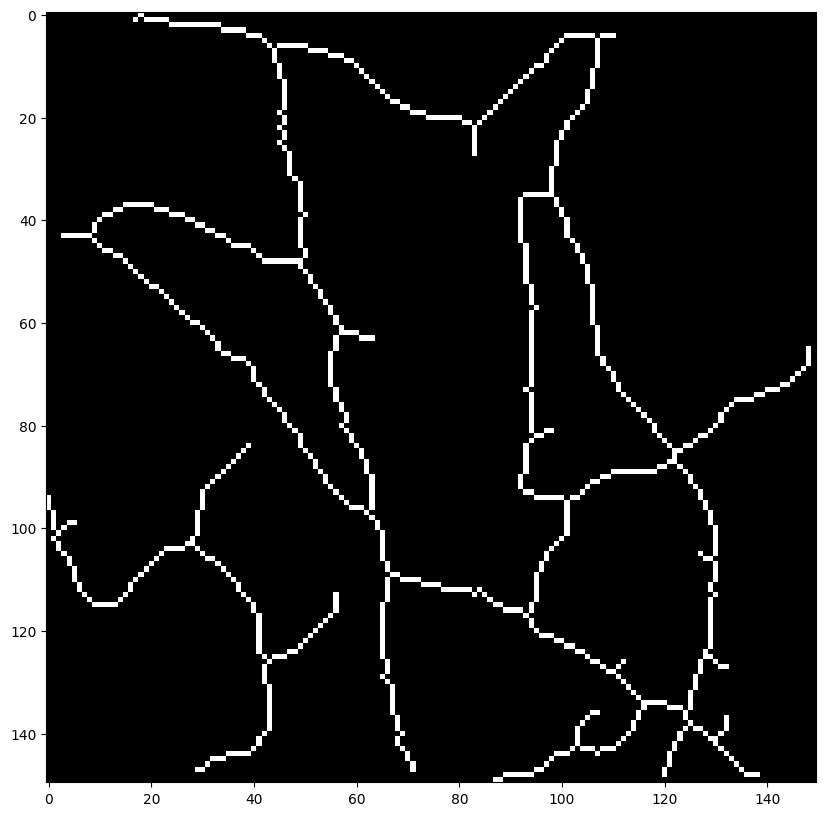

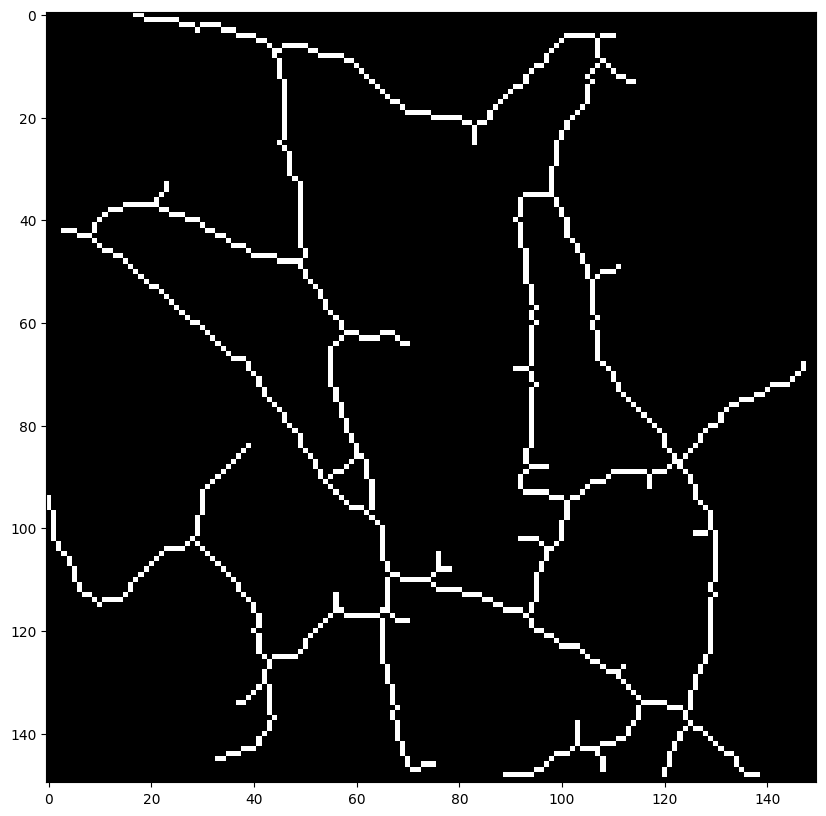

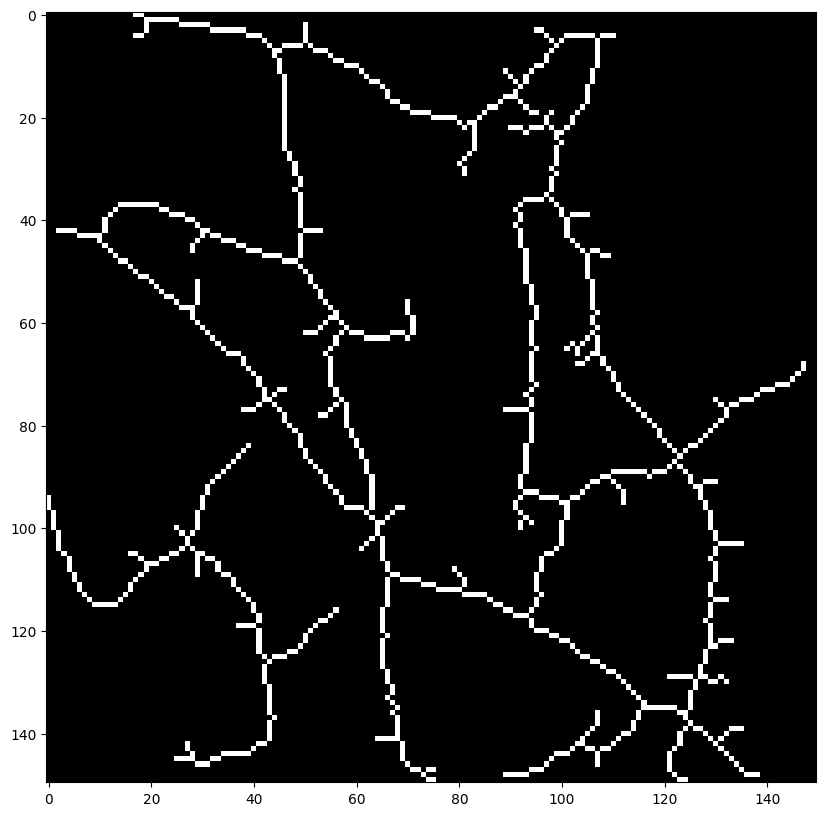

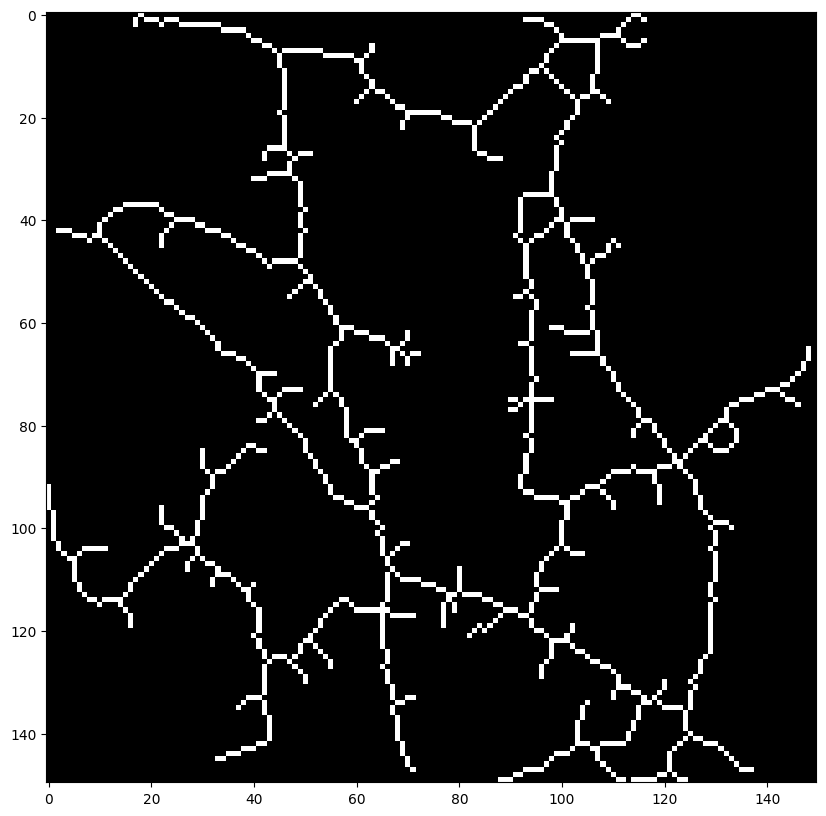

In [7]:
mostra_img(skeleton_Cesar)

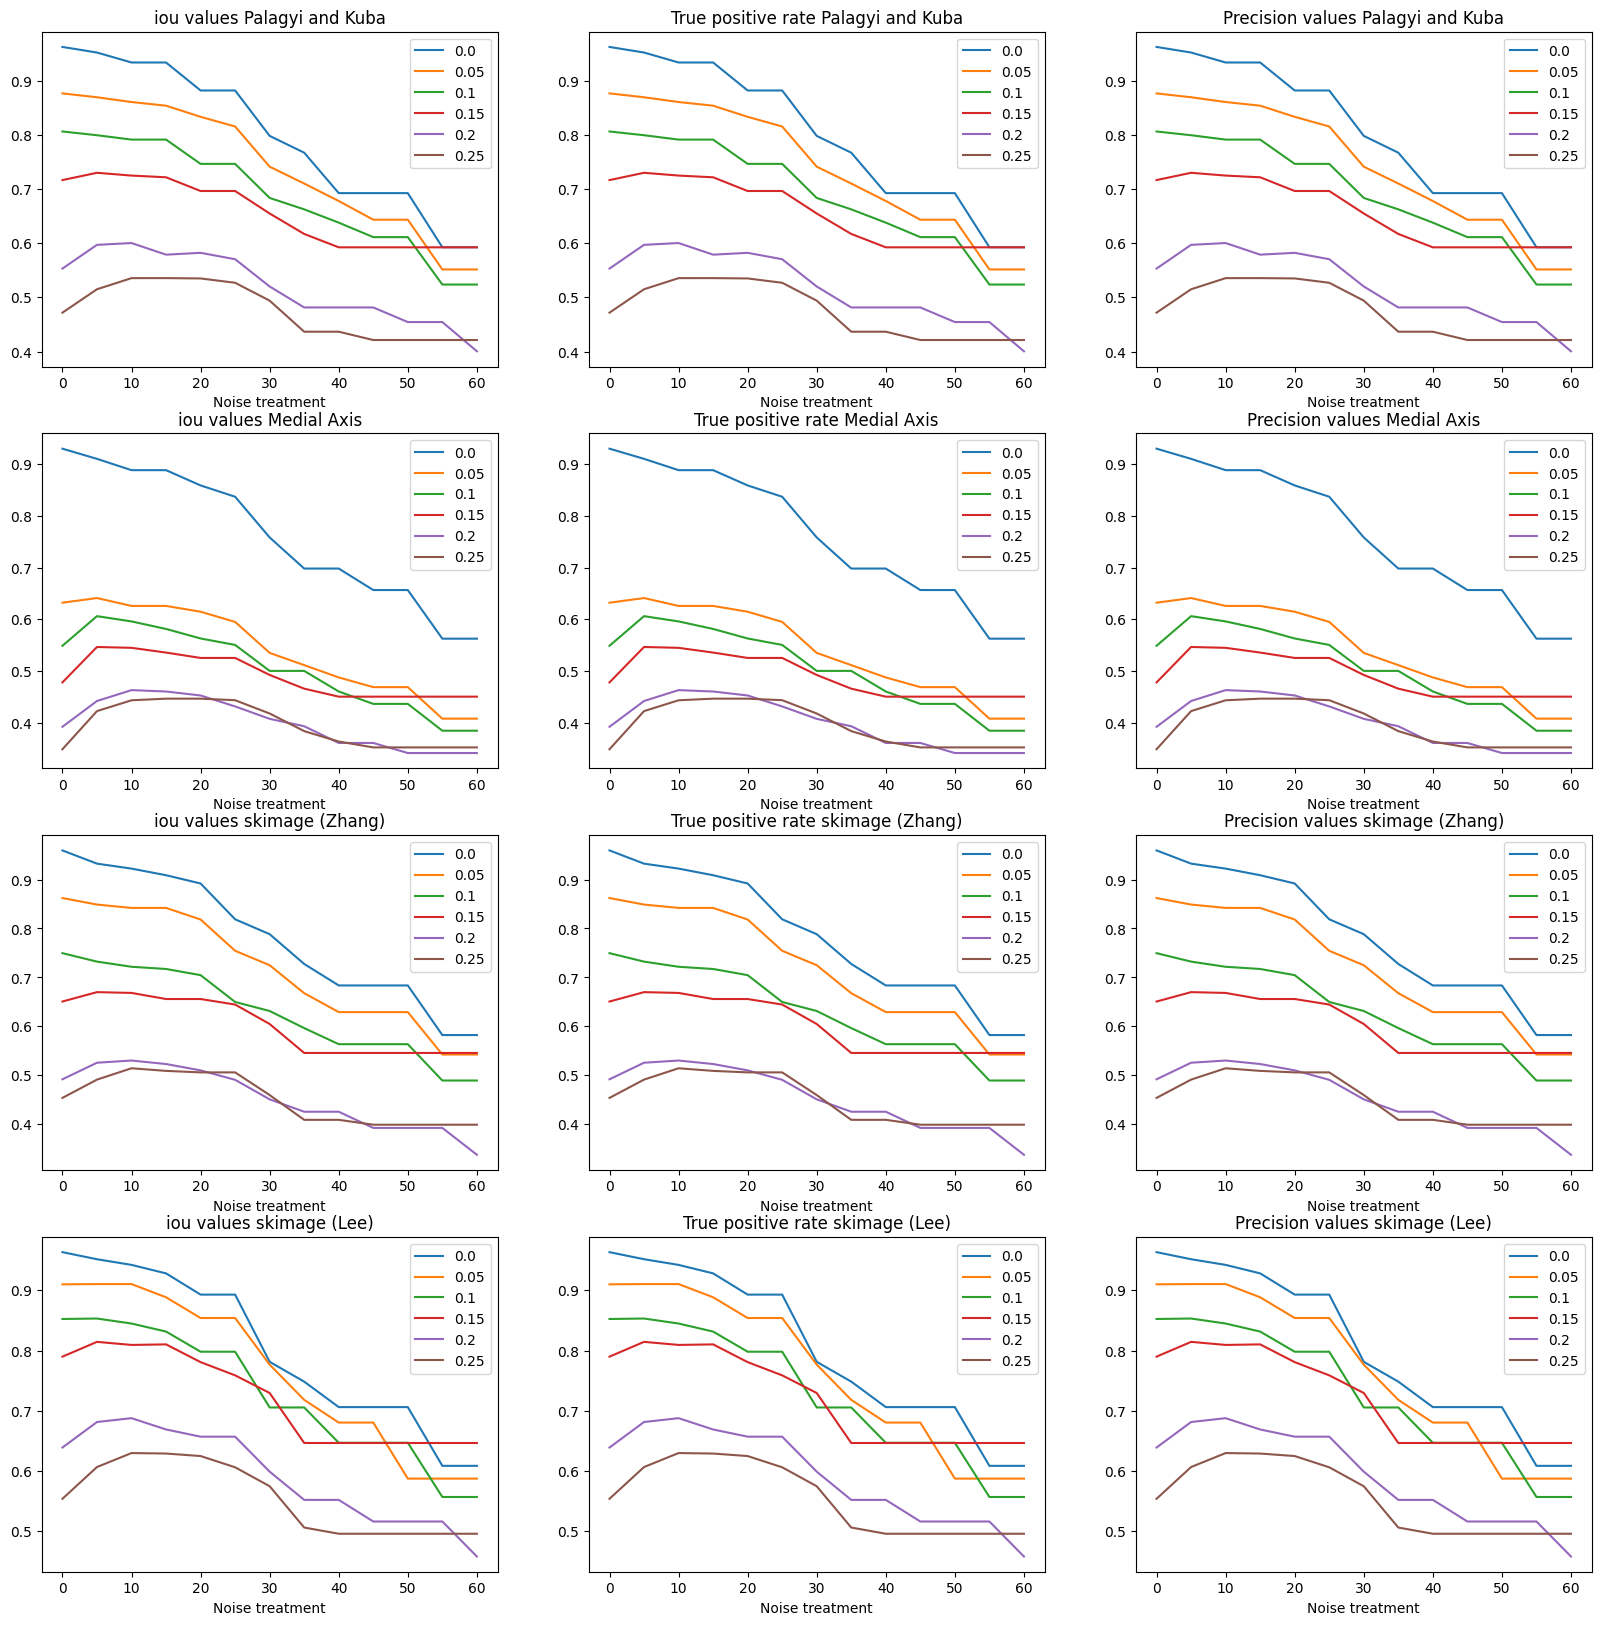

In [8]:
# graph's plot
plt.figure(figsize = [20,20])
for i in range( len(noise_aplication) ):
    #valores do Palagyi e Kuba
    plt.subplot(4, 3, 1)
    plt.title("iou values Palagyi and Kuba")
    plt.plot(noise_treatment, iou_graph_Cesar[i], label=f'{noise_aplication[i]}')
    plt.xlabel("Noise treatment")
    plt.legend()
    
    plt.subplot(4,3,2)
    plt.title("True positive rate Palagyi and Kuba")
    plt.plot(noise_treatment, iou_graph_Cesar[i], label=f'{noise_aplication[i]}')
    plt.xlabel("Noise treatment")
    plt.legend()
    
    plt.subplot(4,3,3)
    plt.title("Precision values Palagyi and Kuba")
    plt.plot(noise_treatment, iou_graph_Cesar[i], label=f'{noise_aplication[i]}')
    plt.xlabel("Noise treatment")
    plt.legend()
    
    
    ## valores do Medial Axis
    plt.subplot(4, 3, 4)
    plt.title("iou values Medial Axis")
    plt.plot(noise_treatment, iou_graph_MA[i], label=f'{noise_aplication[i]}')
    plt.xlabel("Noise treatment")
    plt.legend()
    
    plt.subplot(4,3,5)
    plt.title("True positive rate Medial Axis")
    plt.plot(noise_treatment, iou_graph_MA[i], label=f'{noise_aplication[i]}')
    plt.xlabel("Noise treatment")
    plt.legend()
    
    plt.subplot(4,3,6)
    plt.title("Precision values Medial Axis")
    plt.plot(noise_treatment, iou_graph_MA[i], label=f'{noise_aplication[i]}')
    plt.xlabel("Noise treatment")
    plt.legend()

    
    ## valores do skimage Zhang
    plt.subplot(4, 3, 7)
    plt.title("iou values skimage (Zhang)")
    plt.plot(noise_treatment, iou_graph_skimage[i], label=f'{noise_aplication[i]}')
    plt.xlabel("Noise treatment")
    plt.legend()
    
    plt.subplot(4,3,8)
    plt.title("True positive rate skimage (Zhang)")
    plt.plot(noise_treatment, iou_graph_skimage[i], label=f'{noise_aplication[i]}')
    plt.xlabel("Noise treatment")
    plt.legend()
    
    plt.subplot(4,3,9)
    plt.title("Precision values skimage (Zhang)")
    plt.plot(noise_treatment, iou_graph_skimage[i], label=f'{noise_aplication[i]}')
    plt.xlabel("Noise treatment")
    plt.legend()
    
    
    ##valores do skimage lee
    plt.subplot(4, 3, 10)
    plt.title("iou values skimage (Lee)")
    plt.plot(noise_treatment, iou_graph_skimage_lee[i], label=f'{noise_aplication[i]}')
    plt.xlabel("Noise treatment")
    plt.legend()
    
    plt.subplot(4,3,11)
    plt.title("True positive rate skimage (Lee)")
    plt.plot(noise_treatment, iou_graph_skimage_lee[i], label=f'{noise_aplication[i]}')
    plt.xlabel("Noise treatment")
    plt.legend()
    
    plt.subplot(4,3,12)
    plt.title("Precision values skimage (Lee)")
    plt.plot(noise_treatment, iou_graph_skimage_lee[i], label=f'{noise_aplication[i]}')
    plt.xlabel("Noise treatment")
    plt.legend()

In [9]:
len(skeleton_Cesar)

6

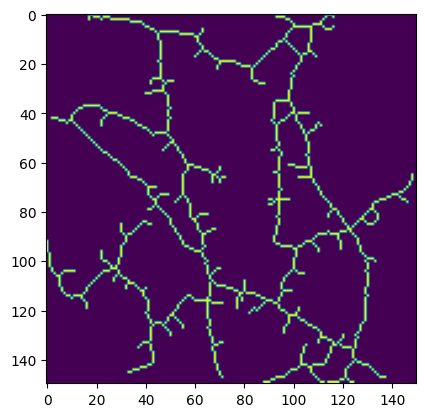

In [10]:
plt.imshow(skeleton_Cesar[5])

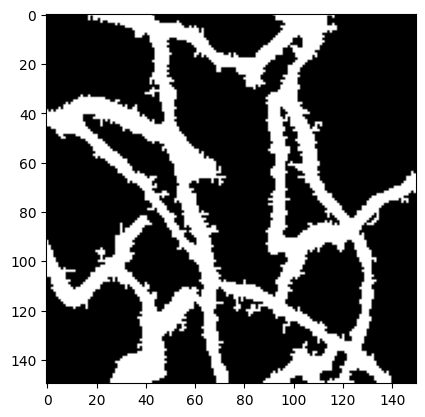

In [11]:
aux = img_noise[5]
img2 = np.zeros((aux.shape[0], aux.shape[1], 3), dtype = np.uint8)
img2[:,:,0] = aux * 255
img2[:,:,1] = aux * 255
img2[:,:,2] = aux * 255
plt.imshow(img2)
#plt.imsave("segmentated_noise.png", img2)

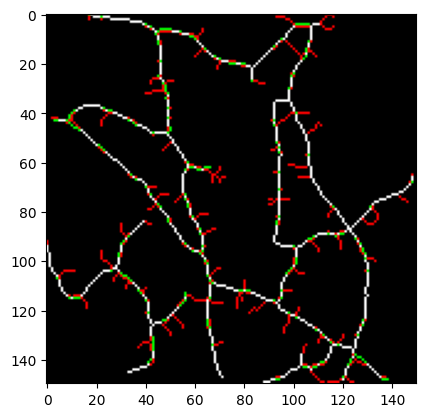

In [12]:
img3 = merge_image(skeleton_Cesar[5], skeleton_Cesar[0])
plt.imshow(img3)
#plt.imsave("merge_CHC_Noise.png", img3)
#plt.imsave("segmentated_noise.png", img_noise[5])

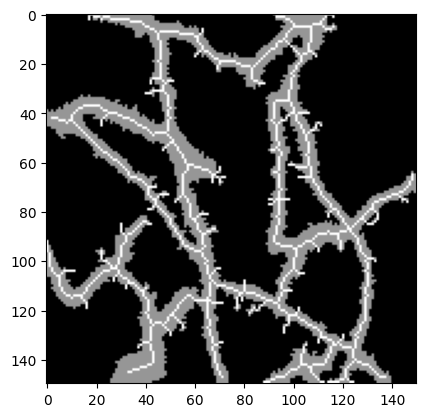

In [13]:
img4 = merge_image(img_noise[5], skeleton_Cesar[5], ([150, 150, 150], [0, 0, 255]))
plt.imshow(img4)
#plt.imsave('skeleton_palagyi-kuba_noise.png', img4)

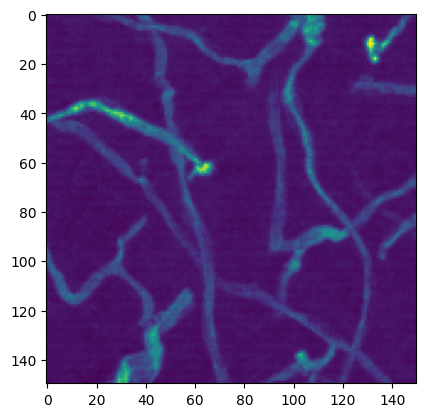

In [14]:
plt.imshow(img)

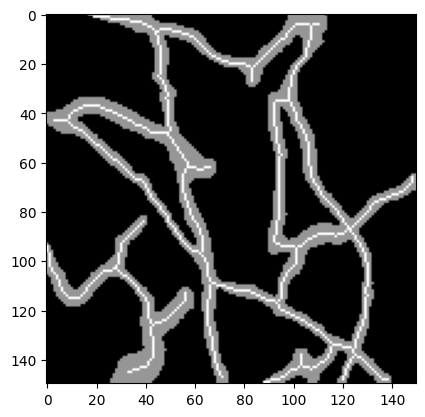

In [15]:
img4 = merge_image(img_noise[0], skeleton_Cesar[0], ([150, 150, 150], [255, 0, 0]))
plt.imshow(img4)
#plt.imsave('skeleton_without_noise_palagyi.png', img4)

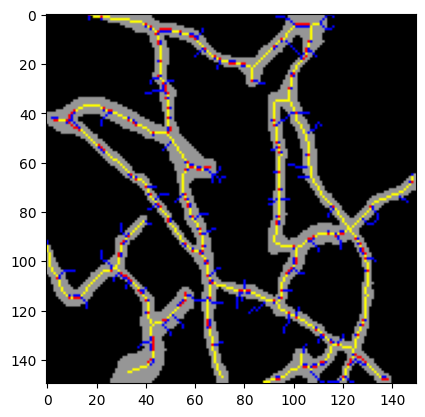

In [16]:
img4 = merge_modified(skeleton_Cesar[0], skeleton_Cesar[-1], background = img_noise[0])
plt.imshow(img4)
#plt.imsave('comparation_noise_groundtruth_palagyi.png', img4)

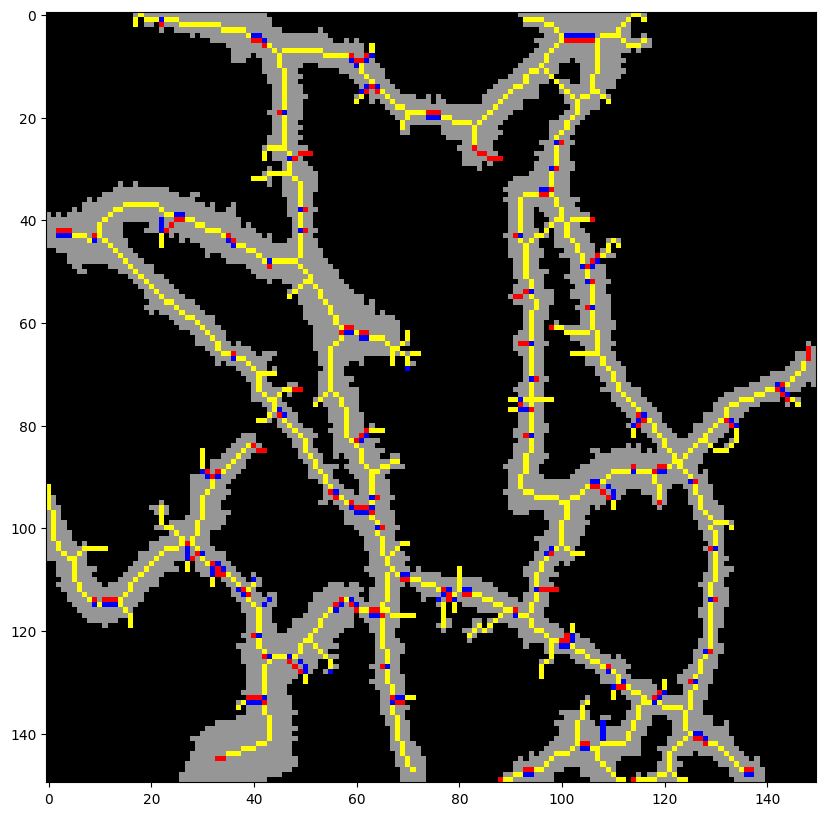

In [17]:
plt.figure(figsize = [10, 10])
plt.imshow(merge_modified(skeleton_Cesar[-1], skeleton_skimage_lee[-1], background = img_noise[5]) )

In [18]:
print(img_suave.shape)
im.Image(img_suave)

(150, 150)


Path: None
Size: (150, 150)
Pixel size: (1.0, 1.0)
Type: uint8
Range: [0,1]
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [19]:
im.Image(img)

Path: None
Size: (150, 150)
Pixel size: (1.0, 1.0)
Type: uint8
Range: [44,236]
array([[55, 53, 54, ..., 74, 73, 63],
       [54, 53, 54, ..., 79, 65, 54],
       [54, 54, 55, ..., 63, 56, 55],
       ...,
       [54, 52, 51, ..., 57, 56, 57],
       [51, 50, 50, ..., 53, 52, 51],
       [47, 49, 50, ..., 49, 50, 50]], dtype=uint8)

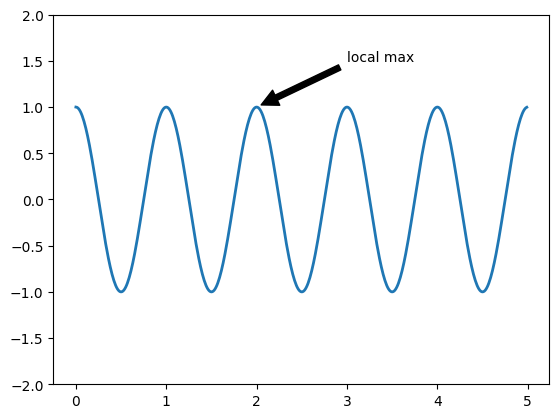

In [20]:
ax = plt.subplot()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

TypeError: imsave() missing 1 required positional argument: 'arr'

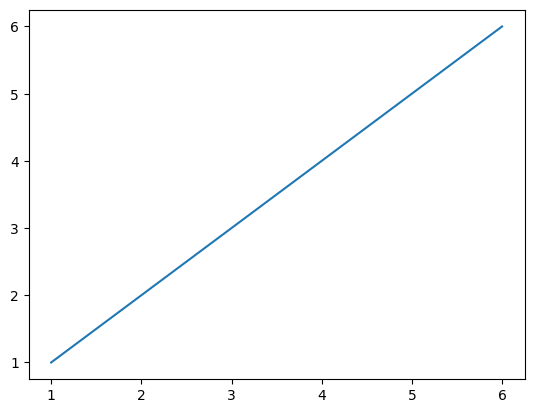

In [21]:
x = np.array((1,2,3,4,5,6))
y = np.array((1, 2, 3, 4, 5, 6))
plt.plot(x, y)
plt.imsave('test.png', )

In [ ]:
# Importing the matplotliband NumPy module
import matplotlib.pyplot as plt
import numpy as np
# Plotting using numpy's random
img = np.random.randn(50, 100)
# Saving the image file
plt.imsave('image.png', img)